# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Galuh panca wirasa
- **Email:** m262b4ky1585@bangkit.academy
- **ID Dicoding:** galuh_panca

## Menentukan Pertanyaan Bisnis

- Kapan hari tersibuk untuk penyewaan sepeda dalam seminggu
- Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [ ]:
data_sewa_sepeda = pd.read_csv("./sample_data/day.csv")
print(data_sewa_sepeda.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


**Insight:**
Kode ini akan menampilkan 5 baris pertama dari DataFrame "data_sewa_sepeda"

### Assessing Data

In [ ]:
print(data_sewa_sepeda.info())
print("Jumlah duplikasi: ", data_sewa_sepeda.duplicated().sum())
print(data_sewa_sepeda.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
Jumlah duplikasi:  0
          instant      season          yr        mnth     holiday  

**Insight:**
dalam kasus ini data_sewa_sepeda tidak ada masalah sama sekali dari seluruh kolom dan juga tidak terjadi ada missing values dan inaccurate value

### Cleaning Data

**Insight:**
karena tidak ada data yang kotor maka tahap cleaning data di lewatkan

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
print(data_sewa_sepeda.describe(include="all"))

           instant      dteday      season          yr        mnth  \
count   731.000000         731  731.000000  731.000000  731.000000   
unique         NaN         731         NaN         NaN         NaN   
top            NaN  2011-01-01         NaN         NaN         NaN   
freq           NaN           1         NaN         NaN         NaN   
mean    366.000000         NaN    2.496580    0.500684    6.519836   
std     211.165812         NaN    1.110807    0.500342    3.451913   
min       1.000000         NaN    1.000000    0.000000    1.000000   
25%     183.500000         NaN    2.000000    0.000000    4.000000   
50%     366.000000         NaN    3.000000    1.000000    7.000000   
75%     548.500000         NaN    3.000000    1.000000   10.000000   
max     731.000000         NaN    4.000000    1.000000   12.000000   

           holiday     weekday  workingday  weathersit        temp  \
count   731.000000  731.000000  731.000000  731.000000  731.000000   
unique         NaN 

**Insight:**
Berdasarkan parameter statistik, memperoleh informasi jumlah total observasi sebanyak 731. dan waktu tersibuk untuk penyewaan itu di weekday (hari kerja) artinya orang yang menyewa sepeda ini tujuannya untuk pergi bekerja

## Visualization & Explanatory Analysis

### Pertanyaan 1:

weekday
0    4228.828571
1    4338.123810
2    4510.663462
3    4548.538462
4    4667.259615
5    4690.288462
6    4550.542857
Name: cnt, dtype: float64


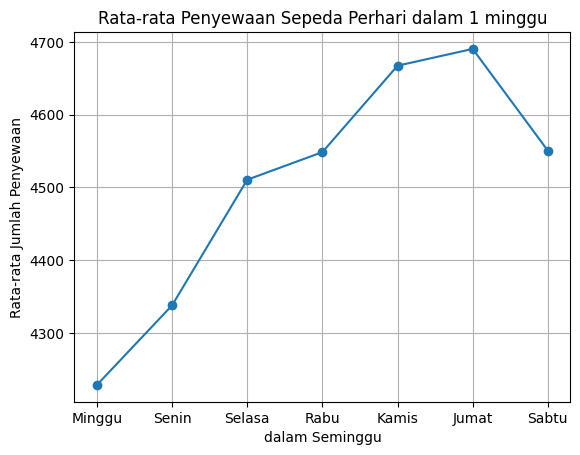

In [ ]:
waktu_tersibuk = data_sewa_sepeda.groupby('weekday')['cnt'].mean()
print(waktu_tersibuk)
waktu_tersibuk.plot(kind='line', title='Rata-rata Penyewaan Sepeda Perhari dalam 1 minggu', marker='o')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.xlabel('dalam Seminggu')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Minggu', 'Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu'])
plt.grid(True)
plt.show()


### Pertanyaan 2:

weathersit
Cerah           4876.786177
Hujan ringan    4035.862348
kabut           1803.285714
Name: cnt, dtype: float64


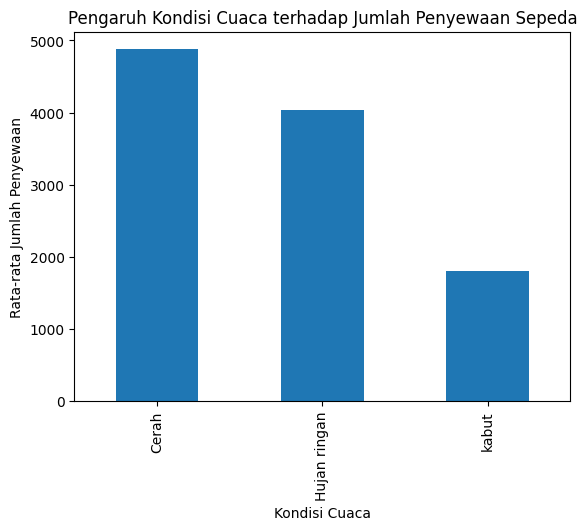

In [ ]:
pengaruh_cuaca = data_sewa_sepeda.groupby('weathersit')['cnt'].mean()
cuaca_label = {1: 'Cerah', 2: 'Hujan ringan', 3: 'kabut'}
pengaruh_cuaca.index = pengaruh_cuaca.index.map(cuaca_label)
print(pengaruh_cuaca)

pengaruh_cuaca.plot(kind='bar', title='Pengaruh Kondisi Cuaca terhadap Jumlah Penyewaan Sepeda')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.xlabel('Kondisi Cuaca')
plt.show()

**Insight:**
1. Dari hasil ini bisa dilihat bahwa di hari tersibuk untuk penyewaan sepeda. Biasanya, di hari kerja ketika orang-orang bepergian ke tempat kerja.

2. rata-rata jumlah penyewaan sepeda berubah tergantung pada kondisi cuaca. Biasanya, kondisi cuaca yang lebih baik akan menghasilkan penyewaan sepeda yang lebih tinggi, dan kondisi cuaca buruk akan turun.

## Analisis Lanjutan (Opsional)

## Conclusion

1. hari-hari dengan aktivitas penyewaan sepeda tertinggi terjadi di hari kerja dikarenakan orang orang yang berada di daerah sana mungkin sudah terbiasa untuk pergi bekerja menggunakan sepeda serta sudah menjadi tradisi di sana Sebaliknya, di hari libur justru lebih rendah dari hari-hari kerja,  mungkin menunjukkan pola yang lebih stabil.

2. Dari hasil pengelompokan dan analisis berdasarkan kolom weathersit, dapat disimpulkan bahwa cuaca yang lebih baik cenderung meningkatkan jumlah penyewaan sepeda. Kondisi cuaca buruk seperti hujan atau kabut kemungkinan besar menurunkan rata-rata jumlah penyewaan sepeda, karena pengguna tidak mau bersepeda dalam cuaca yang tidak mendukung untuk bersepeda.